[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.1%20%EC%9D%BC%EB%B3%84%20%EC%88%98%EC%9D%B5%EB%A5%A0%EA%B3%BC%20%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0-output.ipynb)

# 기술적 분석을 위한 판다스 기능 익히기
## 기술적 분석
금융시장의 가격 예측에는 몇가지 방법이 있다. 학계에서 일반적으로 인정되는 것은 효율적 시장 가설(EMH)과 랜덤워크 이론으로, 이는 <font color="red">시장에서의 가격 예측이 불가능하다는 결론</font>에 이른다.

이런 이론에도 불구하고 실무에서는 어떻게든 가격 움직임을 맞히려 애쓸 때가 많다. 기본적 분석(fundamental analysis)은 가격 결정의 원인을 거슬러올라간다. 주식은 회사의 소유지분이며, 주가는 기본적으로 그 회사의 수익성이나 사업 전망 등에 의해 결정된다 할 것이다. 수익성이 높은데 주가가 상대적으로 낮다면, 가격은 회사 가치에 일치하는 방향으로 움직일 것이라 기대할 수 있다. 기본적 분석은 이처럼 가격과 실제 가치의 괴리를 발견하기 위한 방법이다. 워런 버핏이 이런 투자 방법으로 유명하다.

기술적 분석은 시장의 가격 그 자체에만 관심을 갖고, 그런 가격 움직임의 원인에는 관심을 두지 않는다. 몇가지 가정과, 과거와 현재의 가격 움직임에 따라 미래의 가격이 어떻게 움직일지를 예측한다. 기술적 분석은 이론적인 뒷받침이 거의 없으며, 분석의 유효성은 과거의 시장 경험에 의존한다. 오늘날 개인용 컴퓨터가 보급됨에 따라 확산되고 있다.

기본적 분석은 경제분석가, 시장분석가, 에널리스트의 지지를 받으며 발전을 지속하고 있으며, 고액 연봉을 받는 이들 분석가들은 펀드매니저와 함께 시장의 주류를 형성하고 있다. 반면 기술적 분석가는 일부 증권사에서 한 두 명이 리서치 센터에 속하며 그래프를 통한 시장분석을 내 놓고 있으나, 보조적인 입장에서 개인투자자에게 참고자료를 제공하는 위치에 서 있다. 기관투자가들은 거의 대부분 기본적분석을 중심으로 시장 대응하고 있으며, 개인투자자들은 주로 기술적 분석에 의거하여 시장에 참여하고 있다.

* 출처 : [기술적 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B8%B0%EC%88%A0%EC%A0%81_%EB%B6%84%EC%84%9D)

## 효율적 시장 가설(Efficient Market Hypothesis)

금융경제학에서 모든 시장참여자가 완벽한 정보를 가지고 있을 때 자산가격이 균형에 도달한다는 가설이다.

* 출처 : [효율적 시장 가설 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9A%A8%EC%9C%A8%EC%A0%81_%EC%8B%9C%EC%9E%A5_%EA%B0%80%EC%84%A4)

## MTS(Mobile Trading System) 에서 제공하는 각종 기술적 분석 지표

<img src="https://i.imgur.com/67VgH44.png">

## 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 시각화를 위한 matplotlib, 주가 데이터 수집을 위한 FinanceDataReader
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

## 삼성전자 일별시세 불러오기

In [2]:
# 삼성전자 : 005930
df = fdr.DataReader("005930", "2020", "2022")
df.shape

(427, 6)

In [3]:
# 일별 시세 미리보기
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921


## Shift 를 활용해 전일 대비 수익률 구하기 
### Change 값 직접 구해보기

In [6]:
df['Close'].shift(1) 

Date
2020-01-02        NaN
2020-01-03    55200.0
2020-01-06    55500.0
2020-01-07    55500.0
2020-01-08    55800.0
               ...   
2021-09-13    75300.0
2021-09-14    76300.0
2021-09-15    76600.0
2021-09-16    77000.0
2021-09-17    76100.0
Name: Close, Length: 427, dtype: float64

In [4]:
# Change = ( 종가 / 전일종가 ) - 1
df["Change2"] =  df["Close"] / df["Close"].shift(1) - 1   

In [5]:
# 불러온 값과 직접 구한 값이 같은지 확인하기
df[["Change", "Change2"]].head()

,Change,Change2
Date,,
2020-01-02,-0.010753,NaN
2020-01-03,0.005435,0.005435
2020-01-06,0.000000,0.000000
2020-01-07,0.005405,0.005405
2020-01-08,0.017921,0.017921


### pct_change 값 직접 구하기
* pandas의 pct_change 를 사용해서 구해볼 수도 있습니다.

In [7]:
# pct_change = (종가/전일종가) - 1
df["pct_change"] = df["Close"].pct_change()
df.head()

,Open,High,Low,Close,Volume,Change,Change2,pct_change
Date,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,0.005435,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.000000,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405,0.005405,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921,0.017921,0.017921


In [8]:
# Diff 값 구하기
df["Diff"] = df["Close"].diff()

In [9]:
df["Diff"]

Date
2020-01-02       NaN
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
               ...  
2021-09-13    1000.0
2021-09-14     300.0
2021-09-15     400.0
2021-09-16    -900.0
2021-09-17    1100.0
Name: Diff, Length: 427, dtype: float64

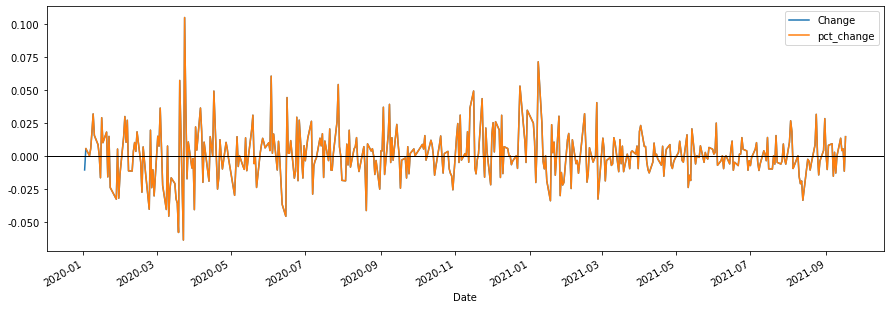

In [11]:
# "Change", "pct_change" 시각화 하기
df[["Change", "pct_change"]].plot(figsize=(15, 5))
plt.axhline(0, c="k", lw=1)

## diff 를 통한 증감 구하기

In [13]:
# 이전 데이터와 다음 데이터의 차이를 구합니다.
df["Close"].diff()

Date
2020-01-02       NaN
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
               ...  
2021-09-13    1000.0
2021-09-14     300.0
2021-09-15     400.0
2021-09-16    -900.0
2021-09-17    1100.0
Name: Close, Length: 427, dtype: float64

In [14]:
# shift로 diff 구하기
# 종가 - 전일종가
df["Diff_Shift"] = df["Close"] - df["Close"].shift(1)
df

,Open,High,Low,Close,Volume,Change,Change2,pct_change,Diff,Diff_Shift
Date,,,,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN,NaN,NaN,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,0.005435,0.005435,300.0,300.0
2020-01-06,54900,55600,54600,55500,10278951,0.000000,0.000000,0.000000,0.0,0.0
2020-01-07,55700,56400,55600,55800,10009778,0.005405,0.005405,0.005405,300.0,300.0
2020-01-08,56200,57400,55900,56800,23501171,0.017921,0.017921,0.017921,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...
2021-09-13,75200,76300,75100,76300,11397775,0.013280,0.013280,0.013280,1000.0,1000.0
2021-09-14,77100,77700,76600,76600,18167057,0.003932,0.003932,0.003932,300.0,300.0
2021-09-15,77400,77400,76400,77000,12829128,0.005222,0.005222,0.005222,400.0,400.0


## 누적 수익률
* 일별 수익률을 누적곱으로 구합니다.

In [15]:
# Change = ( 종가 / 전일종가 ) - 1
df["Change"] + 1  # 일별 수익률 + 1

Date
2020-01-02    0.989247
2020-01-03    1.005435
2020-01-06    1.000000
2020-01-07    1.005405
2020-01-08    1.017921
                ...   
2021-09-13    1.013280
2021-09-14    1.003932
2021-09-15    1.005222
2021-09-16    0.988312
2021-09-17    1.014455
Name: Change, Length: 427, dtype: float64

In [16]:
0.9 * 1.2 * 2.0 * 0.5

1.08

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


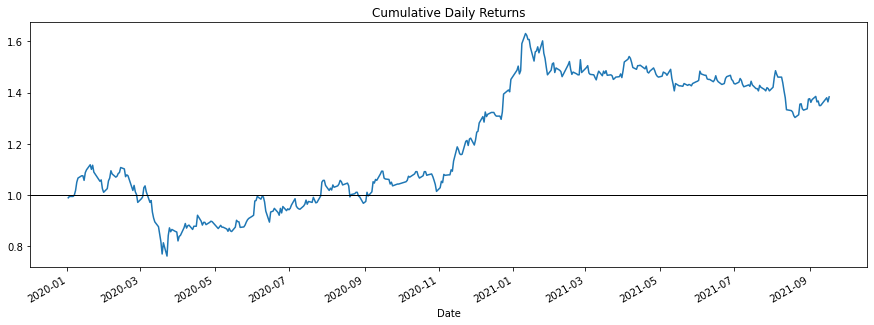

In [17]:
# cumulative Daily Returns 일별 수익률을 누적곱으로 구하기
cum_daily_return =  (df["Change"] + 1).cumprod()  # cumprod() : 누적곱
cum_daily_return.plot(figsize=(15, 5), title="Cumulative Daily Returns")
plt.axhline(1, c="k", lw=1)

In [22]:
plt.axhline??



## 이동평균
통계학에서 이동평균(롤링평균 또는 이동평균)은 전체 데이터 집합의 여러 하위 집합에 대한 일련의 평균을 만들어 데이터 요소를 분석하는 계산이다. 이동산술평균 (Moving Mean) 또는 롤링산술평균(Rolling Mean)이라고도 한다.

일련의 연속된 숫자와 고정된 부분 집합 크기가 주어지면, 이동 평균의 첫 번째 요소는 연속된 숫자의 첫 고정 부분 집합의 평균을 취하여 구한다. 그런 다음 "앞으로 이동"하여 하위 집합을 변경한다. 즉, 부분 집합의 첫 번째 숫자를 제외하고 연속된 숫자의 다음 값을 포함시킨다.


* 출처 : [이동평균 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0)

* 이동평균의 종류
    * 단순이동평균(Simple Moving Average)
    * 누적이동평균(Cumulative moving average)
    * 가중이동평균(Weighted Moving Average)
    * 지수이동평균(Exponential Moving Average)


### rolling
* window : 몇 개의 데이터를 가지고 연산을 할 것인지 결정
    * 의미 : window가 클수록 부드러운 선의 형태를 가지고 있음 window가 center에 있지 않으면 window는 클수록 위상 차가 큼
* min_periods : 최소한 몇 개의 데이터가 있어야 연산을 할 것인지 결정
    * --> window 안의 데이터가 min_periods보다 적다면, 
       결과는 NaN
* center : window의 위치를 window 끝으로 할 것인지 중간으로 할 것 인지 결정
    * 의미 : 시계열 데이터에서는 window를 중간으로 할 수 없다(미래의 데이터는 볼 수 없기 때문에)
* <font color="red">연산을 mean()으로 했을 경우 'rolling'은 전체적으로 진짜 데이터에서 **잡음(noise)을 제거**하는 의미</font>

### expanding

* window : expanding에서는 window를 결정하지 않음
    * 왜냐하면 window의 크기가 순차적으로 증가하기 때문
* min_periods : 최소한 몇 개의 데이터가 있어야 연산을 할 것인지 결정
    * --> 이것은 rolling과 같음
* expanding에서의 sum()은 cumsum() 연산과 동일하게 진행되나 NaN 이 있을 경우 expanding은 무난하게 처리할 수 있음
* 연산을 sum()으로 했을 경우, cumsum()과 같은 의미가 있음
* <font color="red">연산을 mean()으로 했을 경우 'expanding' 은 전체적으로 **추세**를 찾는 의미가 있음</font>

<img src="https://i.imgur.com/mCBaCbd.png">



### 단순이동평균(SMA: Simple Moving Average)
* rolling을 사용합니다.

In [18]:
# 윈도우 7, 14 단순 이동평균 구하기
df["SMA7"] = df["Close"].rolling(7).mean()
df["SMA14"] = df["Close"].rolling(14).mean()

In [21]:
df[["Close", "SMA7", "SMA14"]].head(20)

,Close,SMA7,SMA14
Date,,,
2020-01-02,55200,NaN,NaN
2020-01-03,55500,NaN,NaN
2020-01-06,55500,NaN,NaN
2020-01-07,55800,NaN,NaN
2020-01-08,56800,NaN,NaN
2020-01-09,58600,NaN,NaN
2020-01-10,59500,56700.000000,NaN
2020-01-13,60000,57385.714286,NaN
2020-01-14,60000,58028.571429,NaN


<AxesSubplot:title={'center':'Simple Moving Average'}, xlabel='Date'>

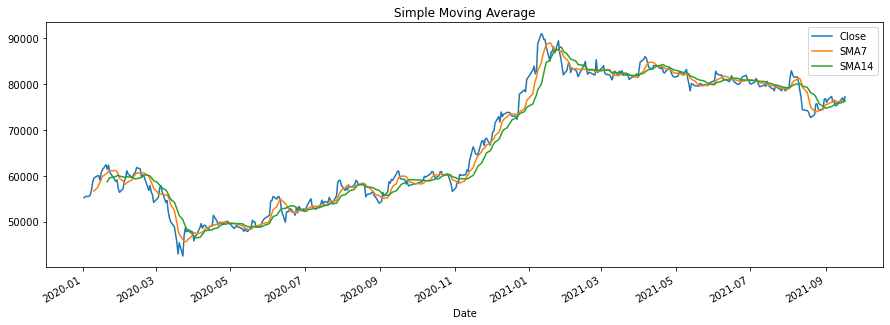

In [19]:
# "Close", "SMA7", "SMA14" 시각화 하기
df[["Close", "SMA7", "SMA14"]].plot(figsize=(15, 5), title="Simple Moving Average")

### 누적이동평균(Cumulative moving average)
* expanding을 사용합니다. window 창이 시간의 흐름에 따라 증가합니다.

In [22]:
# expanding 을 사용하면 window가 시간의 흐름에 따라 증가합니다.
df["CMA"] = df["Close"].expanding(14).mean()

In [24]:
df[["Close", "CMA"]].head(20)

,Close,CMA
Date,,
2020-01-02,55200,NaN
2020-01-03,55500,NaN
2020-01-06,55500,NaN
2020-01-07,55800,NaN
2020-01-08,56800,NaN
2020-01-09,58600,NaN
2020-01-10,59500,NaN
2020-01-13,60000,NaN
2020-01-14,60000,NaN


<AxesSubplot:title={'center':'Cumulative moving average'}, xlabel='Date'>

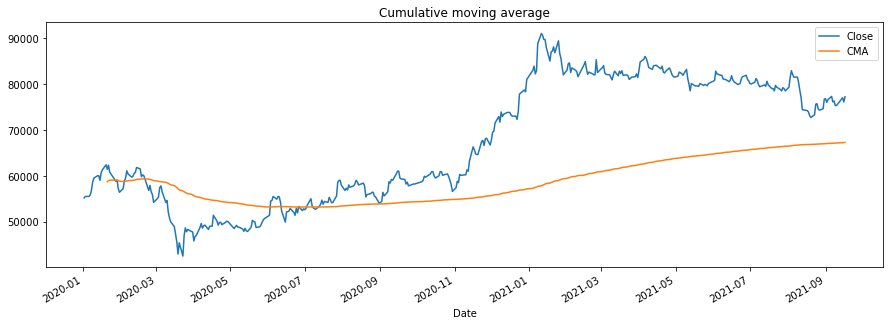

In [25]:
# 누적이동평균 시각화
df[["Close", "CMA"]].plot(figsize=(15,5), title="Cumulative moving average")

### 지수이동평균(Exponential Moving Average)
* 최근 자료에 가중치를 부여하여 최근 가격 변동을 잘 나타냅니다.

In [26]:
# 최근 자료에 가중치를 더 주도록 지수 이동 평균을 구합니다. 최근 가격이 더 가중치를 준다.
# exponential weighted moving
df["EWM_short"] = df["Close"].ewm(span=12).mean() 
df["EWM_long"] = df["Close"].ewm(span=26).mean()

In [27]:
df[["Close", "EWM_short", "EWM_long"]].head(20)

,Close,EWM_short,EWM_long
Date,,,
2020-01-02,55200,55200.000000,55200.000000
2020-01-03,55500,55362.500000,55355.769231
2020-01-06,55500,55416.166282,55407.589946
2020-01-07,55800,55537.327586,55517.290649
2020-01-08,56800,55880.391168,55814.756238
2020-01-09,58600,56541.399192,56372.618349
2020-01-10,59500,57201.600611,56928.806964
2020-01-13,60000,57785.583432,57423.652261
2020-01-14,60000,58223.673847,57805.523554


<AxesSubplot:title={'center':'Exponential Moving Average'}, xlabel='Date'>

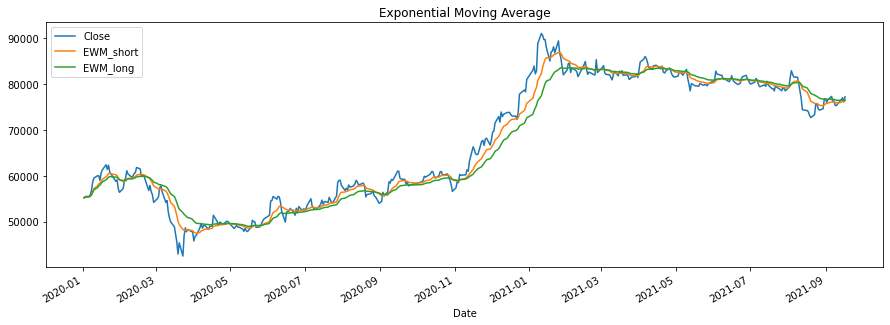

In [28]:
# "Close", "EWM_short", "EWM_long" 시각화
df[["Close", "EWM_short", "EWM_long"]].plot(figsize=(15, 5), 
                                            title="Exponential Moving Average")

<AxesSubplot:xlabel='Date'>

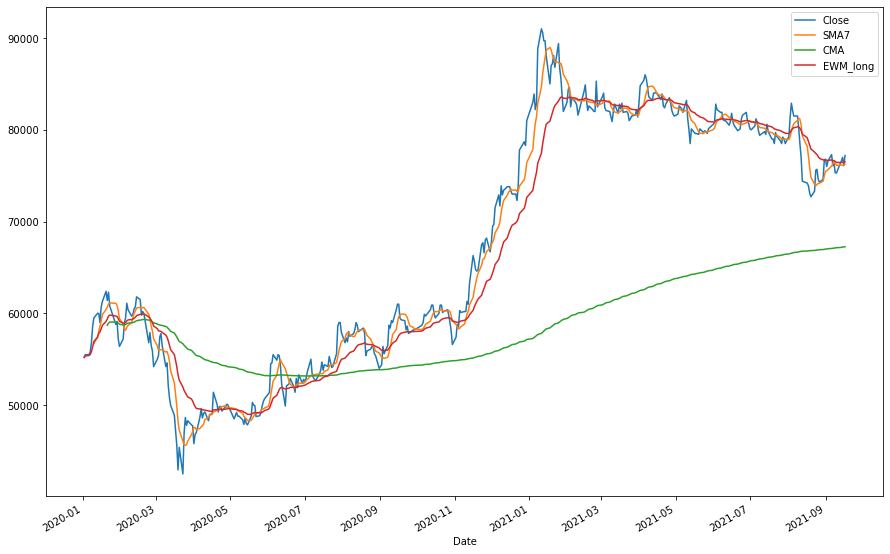

In [31]:
# 다양한 이동평균 비교하기
df[["Close", "SMA7", "CMA", "EWM_long"]].plot(figsize=(15, 10))

## 샘플링
### asfreq
* Convert TimeSeries to specified frequency.

* asfreq : 특정 주기 데이터를 반환
* resample : 특정 주기의 그룹화된 데이터를 반환

In [32]:
# 인덱스의 데이터 타입이 datetime 형태라면 asfreq, resample을 통해 
# 특정 기간만큼 샘플링 혹은 추출을 할 수 있습니다.
df["Close"]

Date
2020-01-02    55200
2020-01-03    55500
2020-01-06    55500
2020-01-07    55800
2020-01-08    56800
              ...  
2021-09-13    76300
2021-09-14    76600
2021-09-15    77000
2021-09-16    76100
2021-09-17    77200
Name: Close, Length: 427, dtype: int64

In [33]:
# asfreq : D단위로 샘플링

df["Close"].asfreq("D") # 일별로 데이터 샘플링

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04        NaN
2020-01-05        NaN
2020-01-06    55500.0
               ...   
2021-09-13    76300.0
2021-09-14    76600.0
2021-09-15    77000.0
2021-09-16    76100.0
2021-09-17    77200.0
Freq: D, Name: Close, Length: 625, dtype: float64

In [34]:
# 일 단위로 샘플링을 하면 영업일이 아닌 데이터들이 결측치(NaN)로 되어 있습니다.
# fillna를 통해 method="ffill" 로 채우면 이전 영업일 데이터로 값을 채울 수 있습니다.

df["Close"].asfreq("D").fillna(method="ffill")  # => 영업일이 아닌 일수에 마지막 영업일 데이터 채우기

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04    55500.0
2020-01-05    55500.0
2020-01-06    55500.0
               ...   
2021-09-13    76300.0
2021-09-14    76600.0
2021-09-15    77000.0
2021-09-16    76100.0
2021-09-17    77200.0
Freq: D, Name: Close, Length: 625, dtype: float64

In [35]:
# df.interpolate? 

In [36]:
# df["Close"].asfreq("D").interpolate()

In [35]:
# 특정 주기 단위로 샘플링 예) 4일
df["Close"].asfreq("4D")

Date
2020-01-02    55200.0
2020-01-06    55500.0
2020-01-10    59500.0
2020-01-14    60000.0
2020-01-18        NaN
               ...   
2021-09-01    76800.0
2021-09-05        NaN
2021-09-09    75300.0
2021-09-13    76300.0
2021-09-17    77200.0
Freq: 4D, Name: Close, Length: 157, dtype: float64

In [38]:
df["Close"].asfreq("7D")

Date
2020-01-02    55200.0
2020-01-09    58600.0
2020-01-16    60700.0
2020-01-23    60800.0
2020-01-30    57200.0
               ...   
2021-08-19    73100.0
2021-08-26    74600.0
2021-09-02    76000.0
2021-09-09    75300.0
2021-09-16    76100.0
Freq: 7D, Name: Close, Length: 90, dtype: float64

In [41]:
# 특정 주기 단위로 샘플링 예) 월단위
df["Close"].asfreq("M").fillna(method="ffill").asfreq("M") ##이런식으로 많이 사용(결측치 채우고 다시 추출)

Date
2020-01-31    56400.0
2020-02-29    56400.0
2020-03-31    47750.0
2020-04-30    47750.0
2020-05-31    47750.0
2020-06-30    52800.0
2020-07-31    57900.0
2020-08-31    54000.0
2020-09-30    54000.0
2020-10-31    54000.0
2020-11-30    66700.0
2020-12-31    66700.0
2021-01-31    66700.0
2021-02-28    66700.0
2021-03-31    81400.0
2021-04-30    81500.0
2021-05-31    80500.0
2021-06-30    80700.0
2021-07-31    80700.0
2021-08-31    76700.0
Freq: M, Name: Close, dtype: float64

In [42]:
# 특정 주기 단위로 샘플링 예) 분기단위
df["Close"].asfreq("Q")

Date
2020-03-31    47750.0
2020-06-30    52800.0
2020-09-30        NaN
2020-12-31        NaN
2021-03-31    81400.0
2021-06-30    80700.0
Freq: Q-DEC, Name: Close, dtype: float64

### resample
* Resample time-series data.

In [43]:
# 일간 평균 구하기
df["Close"].resample("D").mean()

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-04        NaN
2020-01-05        NaN
2020-01-06    55500.0
               ...   
2021-09-13    76300.0
2021-09-14    76600.0
2021-09-15    77000.0
2021-09-16    76100.0
2021-09-17    77200.0
Freq: D, Name: Close, Length: 625, dtype: float64

In [49]:
# 주간 평균 구하기
df["Close"].resample("W").mean()

Date
2020-01-05    55350.0
2020-01-12    57240.0
2020-01-19    60200.0
2020-01-26    61725.0
2020-02-02    57875.0
               ...   
2021-08-22    73475.0
2021-08-29    74700.0
2021-09-05    76140.0
2021-09-12    76060.0
2021-09-19    76640.0
Freq: W-SUN, Name: Close, Length: 90, dtype: float64

In [44]:
# 월간 평균 구하기
df["Close"].resample("M").mean() # upsample

Date
2020-01-31    58815.000000
2020-02-29    59085.000000
2020-03-31    50168.181818
2020-04-30    49045.000000
2020-05-31    49100.000000
2020-06-30    52986.363636
2020-07-31    54726.086957
2020-08-31    56980.000000
2020-09-30    58176.190476
2020-10-31    59736.842105
2020-11-30    63419.047619
2020-12-31    73619.047619
2021-01-31    86565.000000
2021-02-28    83127.777778
2021-03-31    82072.727273
2021-04-30    83586.363636
2021-05-31    80521.052632
2021-06-30    81104.545455
2021-07-31    79577.272727
2021-08-31    77023.809524
2021-09-30    76376.923077
Freq: M, Name: Close, dtype: float64

In [61]:
df["Close"].resample("MS").mean()  # downsample

Date
2020-01-01    58815.000000
2020-02-01    59085.000000
2020-03-01    50168.181818
2020-04-01    49045.000000
2020-05-01    49100.000000
2020-06-01    52986.363636
2020-07-01    54726.086957
2020-08-01    56980.000000
2020-09-01    58176.190476
2020-10-01    59736.842105
2020-11-01    63419.047619
2020-12-01    73619.047619
2021-01-01    86565.000000
2021-02-01    83127.777778
2021-03-01    82072.727273
2021-04-01    83586.363636
2021-05-01    80521.052632
2021-06-01    81104.545455
2021-07-01    79577.272727
2021-08-01    77023.809524
2021-09-01    76376.923077
Freq: MS, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

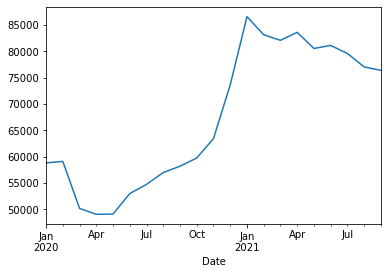

In [45]:
# 월간 평균 시각화
df["Close"].resample("M").mean().plot()

<AxesSubplot:xlabel='Date'>

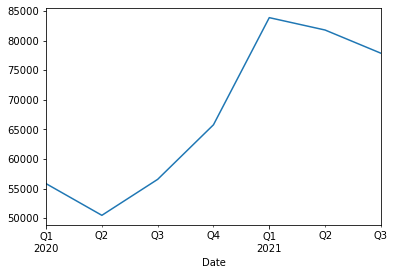

In [46]:
# 분기별 평균 구하기

df["Close"].resample("Q").mean().plot()

In [60]:
# 월별 평균 종가로 수익률 구하기
month_change =  df["Close"].resample("M").mean().pct_change()
month_change

Date
2020-01-31         NaN
2020-02-29    0.004591
2020-03-31   -0.150915
2020-04-30   -0.022388
2020-05-31    0.001121
2020-06-30    0.079152
2020-07-31    0.032833
2020-08-31    0.041185
2020-09-30    0.020993
2020-10-31    0.026826
2020-11-30    0.061640
2020-12-31    0.160835
2021-01-31    0.175851
2021-02-28   -0.039707
2021-03-31   -0.012692
2021-04-30    0.018443
2021-05-31   -0.036672
2021-06-30    0.007246
2021-07-31   -0.018831
2021-08-31   -0.032088
2021-09-30   -0.008399
Freq: M, Name: Close, dtype: float64

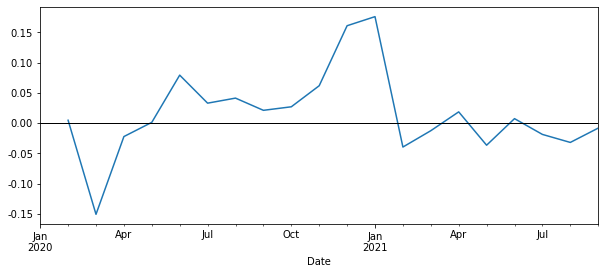

In [51]:
month_change.plot(figsize=(10, 4))
plt.axhline(0, c="k", lw=1)